In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv(r"C:/Users/malon/OneDrive/Desktop/Datasets/WNBA-2014-player-stats-by-game.csv")

In [42]:
df.shape
df.describe
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       4032 non-null   str    
 1   player_id    4032 non-null   int64  
 2   team         4032 non-null   str    
 3   date         4032 non-null   int64  
 4   home         4032 non-null   int64  
 5   opponent     4032 non-null   str    
 6   win          4032 non-null   int64  
 7   team_pts     4032 non-null   int64  
 8   opp_pts      4032 non-null   int64  
 9   minutes      4032 non-null   int64  
 10  fgmade       4032 non-null   int64  
 11  fgatt        4032 non-null   int64  
 12  made3        4032 non-null   int64  
 13  att3         4032 non-null   int64  
 14  made1        4032 non-null   int64  
 15  att1         4032 non-null   int64  
 16  offrb        4032 non-null   int64  
 17  defrb        4032 non-null   int64  
 18  totrb        4032 non-null   int64  
 19  assist       4032

In [43]:
df.columns

Index(['Player', 'player_id', 'team', 'date', 'home', 'opponent', 'win',
       'team_pts', 'opp_pts', 'minutes', 'fgmade', 'fgatt', 'made3', 'att3',
       'made1', 'att1', 'offrb', 'defrb', 'totrb', 'assist', 'steal', 'block',
       'turnover', 'fouls', 'points', 'efficiency', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='str')

This Step is me dropping uneccesary columns that don't mean anything to my data set.

In [44]:
df.drop(columns=["Unnamed: 26", "Unnamed: 27"], inplace=True)

I then shaved down the dataset to the top 5 WNBA MVP finalists so the plots are semi readable

In [45]:
new_df = df[df["player_id"].isin([1, 3, 4, 6, 10])]
new_df

,Player,player_id,team,date,home,opponent,win,team_pts,opp_pts,minutes,...,offrb,defrb,totrb,assist,steal,block,turnover,fouls,points,efficiency
0,Maya Moore,1,MIN,516,0,WAS,1,89,77,36,...,4,5,9,3,1,1,1,3,34,35
1,Maya Moore,1,MIN,518,1,CON,1,90,87,43,...,3,9,12,2,5,1,6,5,33,35
2,Maya Moore,1,MIN,523,0,TUL,1,94,93,35,...,3,10,13,2,2,0,4,2,38,43
3,Maya Moore,1,MIN,524,1,NYL,1,87,82,31,...,0,3,3,2,0,2,3,2,30,26
4,Maya Moore,1,MIN,526,0,CHI,1,75,72,35,...,1,6,7,3,3,0,2,2,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Brittney Griner,10,PHO,809,1,MIN,1,82,80,37,...,4,7,11,3,0,2,2,2,19,29
317,Brittney Griner,10,PHO,812,0,NYL,1,76,64,34,...,0,11,11,2,0,3,3,3,14,22
318,Brittney Griner,10,PHO,813,0,ATL,0,82,96,22,...,0,5,5,0,2,3,2,4,9,13
319,Brittney Griner,10,PHO,816,1,LAS,1,76,69,23,...,1,6,7,1,0,2,0,2,19,24


Text(0.5, 1.0, 'Points vs Efficiency with Player as Hue')

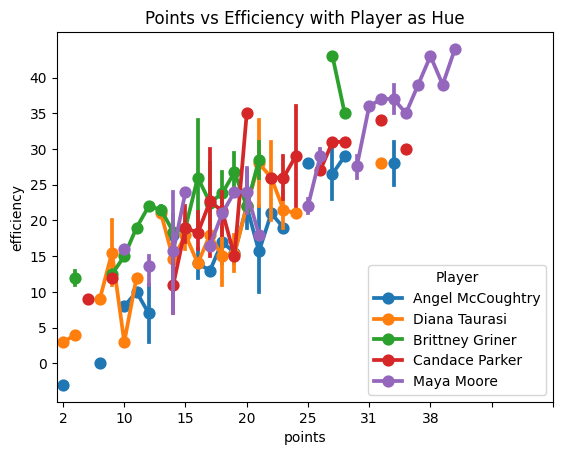

In [46]:
sns.pointplot(data=new_df,x= "points", y="efficiency", hue="Player")
xticks= [0, 5, 10, 15, 20, 25, 30, 35, 40]
plt.xticks(xticks)
yticks= [0, 5, 10, 15, 20,25,30,35,40]
plt.yticks(yticks)
plt.title("Points vs Efficiency with Player as Hue")

In [51]:
Maya_Moore= df[df["player_id"].isin([1])]
Diana_Taurasi=df[df["player_id"].isin([6])]
Brittney_Griner=df[df["player_id"].isin([10])]
Angel_McCoughtry=df[df["player_id"].isin([4])]
Candace_Parker=df[df["player_id"].isin([3])]
top3=df[df["player_id"].isin([1,6,4])]

In [81]:
total_wins= (top3.groupby("Player")["win"].sum())
sns.barplot(data=top3,x= total_wins.index, y="team_pts", hue="Player")
xticks= [0,2,4,6,8,10,12,14,16,18,20]
plt.xticks(xticks)
yticks= [40,50,60,70,80,90,100,110,120]
plt.yticks(yticks)
plt.title("Win vs Team Points with Player as Hue")

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 98 and the vector passed to `x` has length 3.

Text(0.5, 1.0, 'Maya Moore Point Distribution')

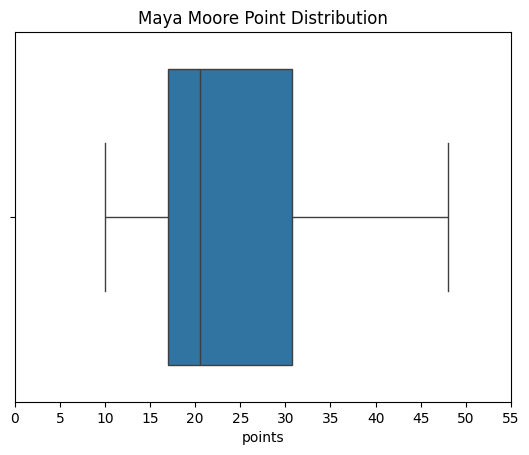

In [55]:
sns.boxplot(data=Maya_Moore,x= "points")
xticks= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,50,55]
plt.xticks(xticks)
plt.title("Maya Moore Point Distribution")